# Scatter Plots
  df.plot(kind='scatter')

## importing and cleanind data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# loading data set
dataset1 = load_dataset('lukebarousse/data_jobs')
dataf = dataset1['train'].to_pandas()
df = dataf.copy()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### First

In [59]:
data= {
    'job_skills':['python','java','C++','R','Power Pi','Excel','C','Tablue'],
    'skill_count':[300,250,200,350,50,100,150,200],
    'skill_pay':[1000,800,900,750,650,700,650,850]
}
data0 = pd.DataFrame(data)

In [60]:
data1 = data0.groupby('job_skills').agg({'skill_pay':['mean'],'skill_count':['max']})

In [71]:
data1

,job_skills,skill_pay,skill_count
,,mean,max
0,C,650.0,150
1,C++,900.0,200
2,Excel,700.0,100
3,Power Pi,650.0,50
4,R,750.0,350
5,Tablue,850.0,200
6,java,800.0,250
7,python,1000.0,300


<Axes: xlabel='skill_count', ylabel='skill_pay'>

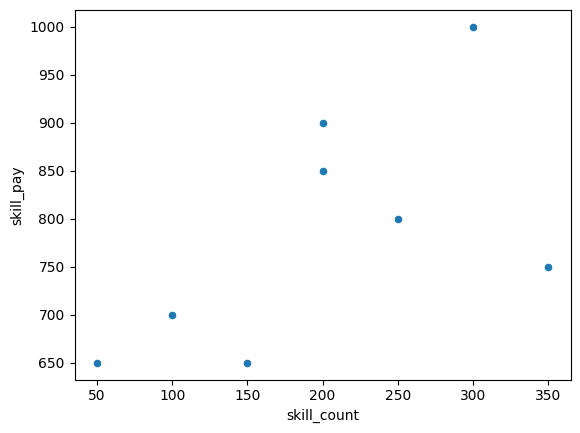

In [72]:
data1.plot(kind='scatter',x='skill_count',y='skill_pay')

### Second

In [30]:
scatter0=df['job_title_short'].value_counts().head(3)

In [31]:
scatter0 = pd.DataFrame(scatter0)

In [34]:
scatter0.reset_index(inplace=True)

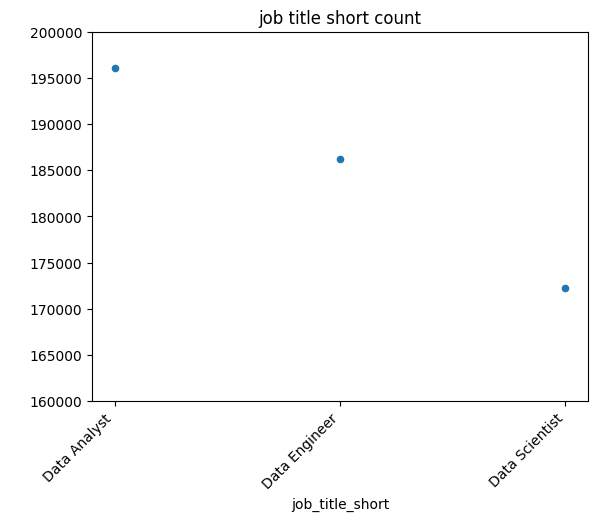

In [40]:
scatter0.plot(kind='scatter',x='job_title_short',y='count')
plt.xticks(rotation=45,ha='right')
plt.ylim(160000,200000)
plt.ylabel(' ')
plt.title('job title short count')
plt.show()

### the work

In [4]:
df1 = df[df['job_title_short']=='Data Scientist']
df1_exploded = df1.explode('job_skills')
skill_state = df1_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), median_salary=('salary_year_avg', 'median')
)
skill_state = skill_state.sort_values(
    by='skill_count', ascending=False).head(20)
skill_state

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


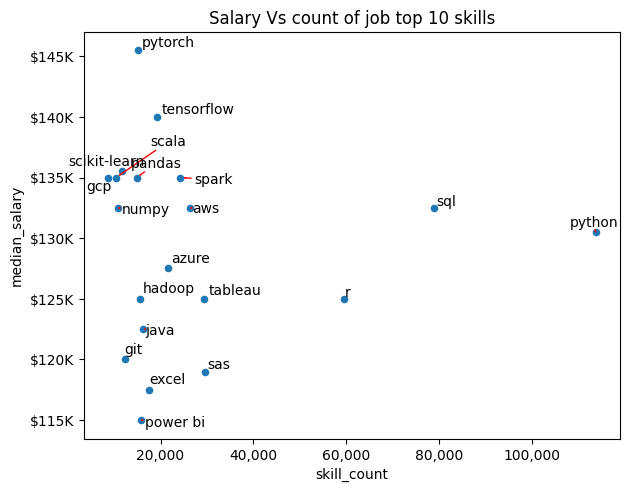

In [9]:
from adjustText import adjust_text
skill_state.plot(kind='scatter',x='skill_count',y='median_salary')

texts=[]
for i,txt in enumerate(skill_state.index):
    texts.append(plt.text(skill_state['skill_count'].iloc[i],skill_state['median_salary'].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='r'))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"{int(x/1000)},000"))

plt.tight_layout()
plt.title('Salary Vs count of job top 10 skills')
plt.show()